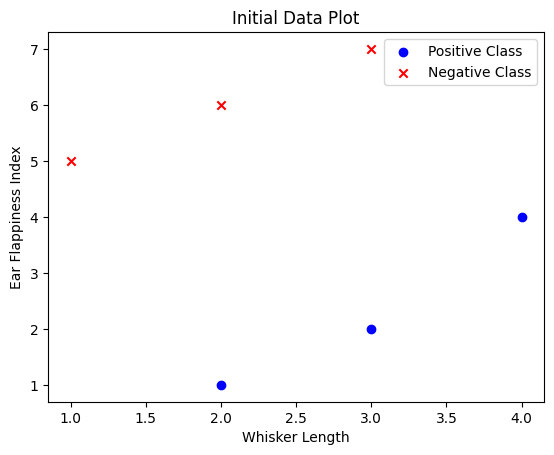

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1+np.exp(-z))

# Loss function: Log likelihood
def compute_loss(y, hx):
    return -np.mean(y*np.log(hx+1e-15) + (1-y)*np.log(1-hx+1e-15))  # Added small constant to avoid log(0)

# Gradient of the loss
def compute_gradient(X, y, hx):
    return np.dot(X.T, (hx-y)) / y.shape[0]

# Dataset
X = np.array([
    [2,1],
    [3,2],
    [4,4],  # Positive examples
    [1,5],
    [2,6],
    [3,7]   # Negative examples
])

y = np.array([1,1,1,0,0,0])   # Labels

# Plot initial data
plt.scatter(X[:3,0], X[:3,1], color='blue', marker='o', label='Positive Class')
plt.scatter(X[3:,0], X[3:,1], color='red', marker='x', label='Negative Class')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.legend()
plt.title('Initial Data Plot')
plt.show()



In [37]:
# Plotting function for decision boundary
def plot_decision_boundary(X, y, weights, loss, iteration):
    plt.scatter(X[:3,1], X[:3,2], color='blue', marker='o', label='Positive Class' if iteration == 0 else "")
    plt.scatter(X[3:,1], X[3:,2], color='red', marker='x', label='Negative Class' if iteration == 0 else "")

    # Extend the x values a bit beyond the minimum and maximum values of the dataset
    x_values = np.array([np.min(X[:,1])-1, np.max(X[:,1])+1])
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, "k")

    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(X[:,2])-1, np.max(X[:,2])+1)

    plt.xlabel('Whisker Length')
    plt.ylabel('Ear Flappiness Index')
    plt.title(f"Decision boundary at iteration {iteration}\nLoss: {loss:.4f}")

    if iteration == 0:
        plt.legend()
    plt.show()


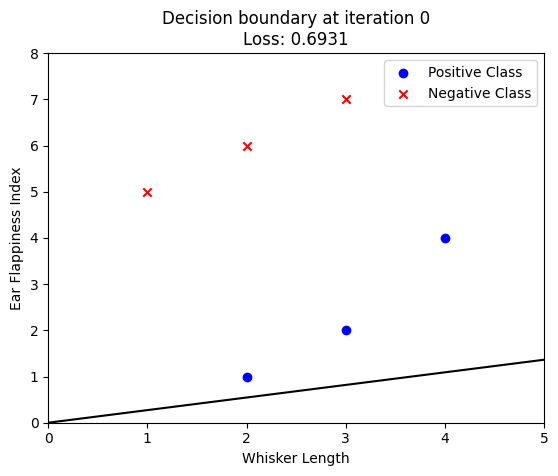

Iteration 0: Theta=[ 0.          0.025      -0.09166667], Loss=0.6931


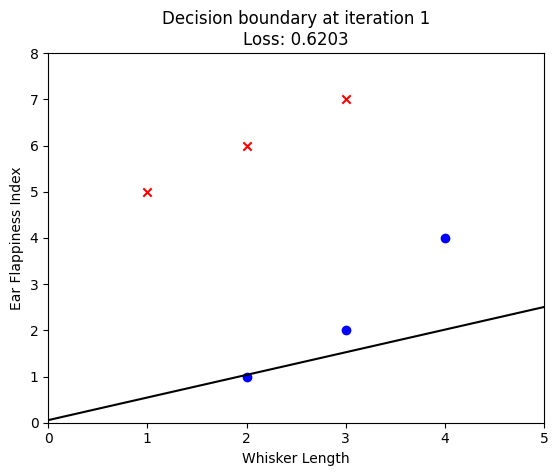

Iteration 1: Theta=[ 0.00784781  0.06887779 -0.14060525], Loss=0.6203


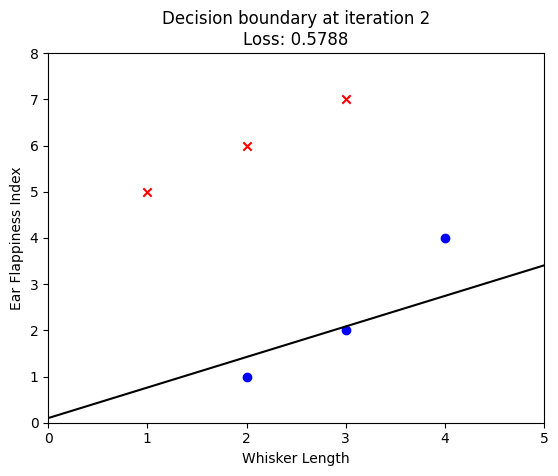

Iteration 2: Theta=[ 0.01764134  0.11658362 -0.17629863], Loss=0.5788


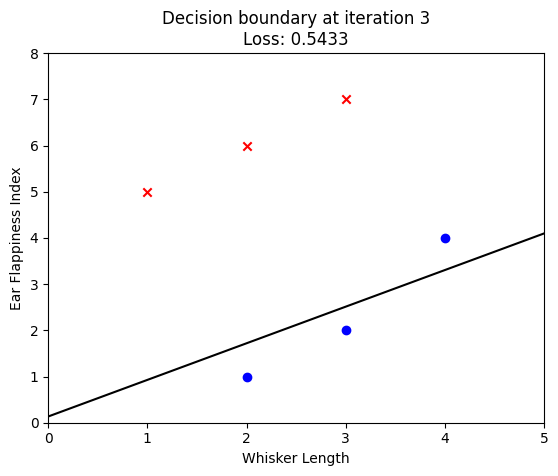

Iteration 3: Theta=[ 0.02775584  0.16401158 -0.20689154], Loss=0.5433


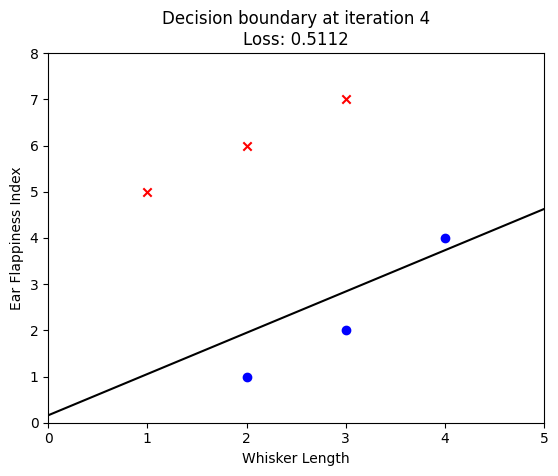

Iteration 4: Theta=[ 0.03768945  0.20992896 -0.23499581], Loss=0.5112


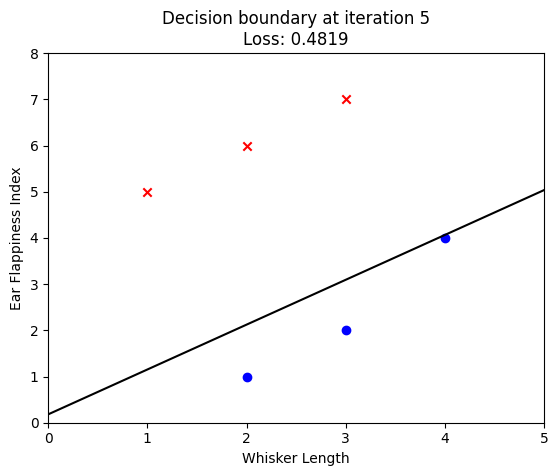

Iteration 5: Theta=[ 0.04728565  0.25399034 -0.26154053], Loss=0.4819


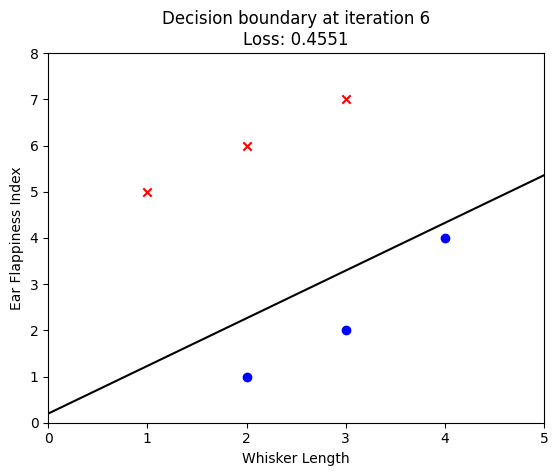

Iteration 6: Theta=[ 0.0565048   0.29615111 -0.28688777], Loss=0.4551


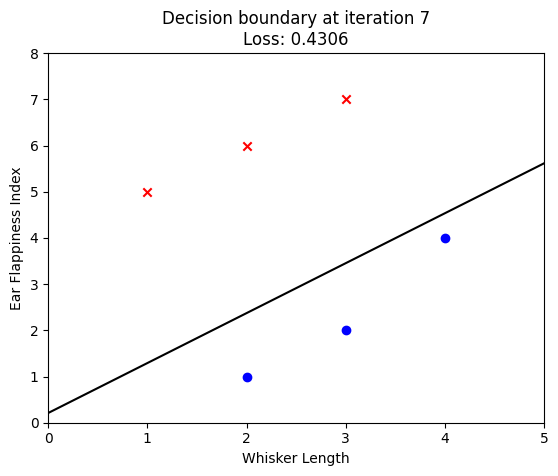

Iteration 7: Theta=[ 0.06534809  0.33647087 -0.31119923], Loss=0.4306


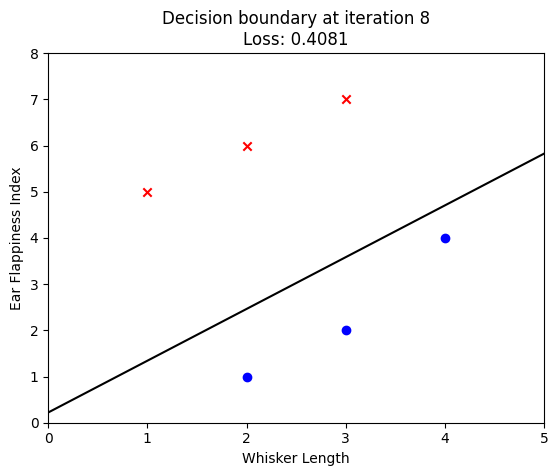

Iteration 8: Theta=[ 0.07383072  0.37504349 -0.3345636 ], Loss=0.4081


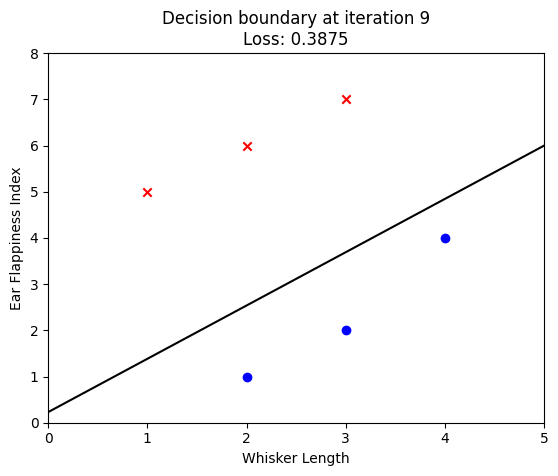

Iteration 9: Theta=[ 0.08197221  0.41197135 -0.35704216], Loss=0.3875


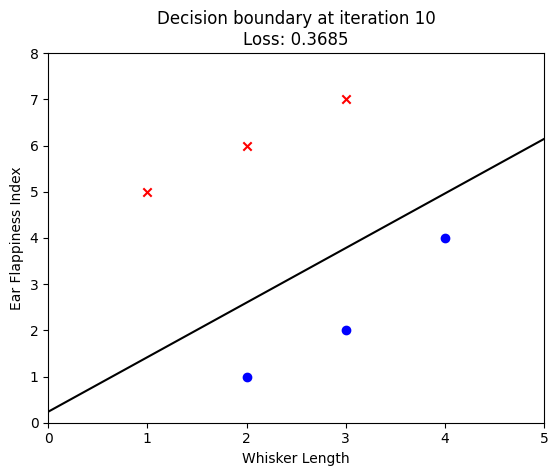

Iteration 10: Theta=[ 0.08979277  0.44735586 -0.37868509], Loss=0.3685


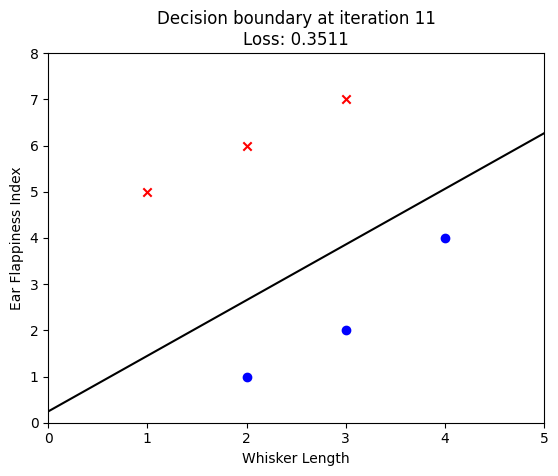

Iteration 11: Theta=[ 0.097312    0.48129378 -0.39953748], Loss=0.3511


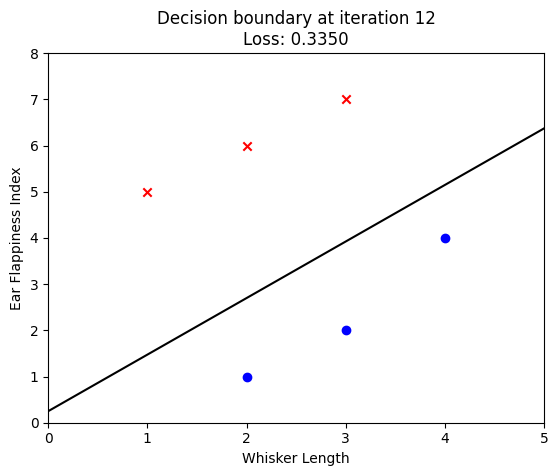

Iteration 12: Theta=[ 0.10454842  0.51387608 -0.41964139], Loss=0.3350


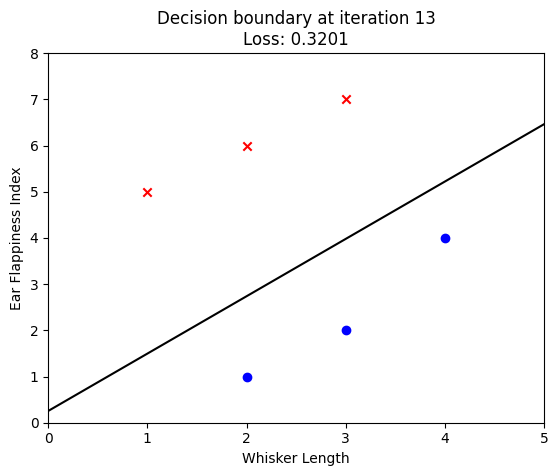

Iteration 13: Theta=[ 0.11151934  0.54518765 -0.43903659], Loss=0.3201


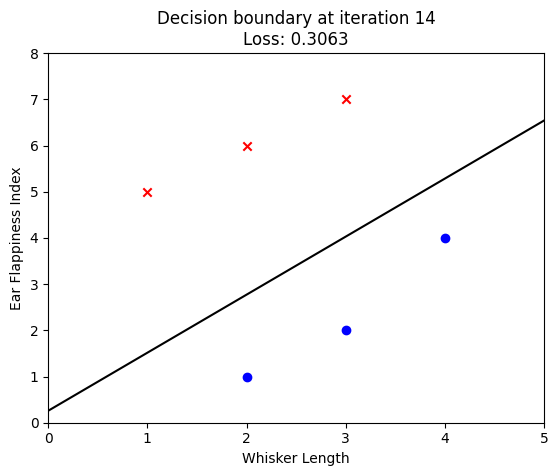

Iteration 14: Theta=[ 0.11824083  0.57530738 -0.45776074], Loss=0.3063


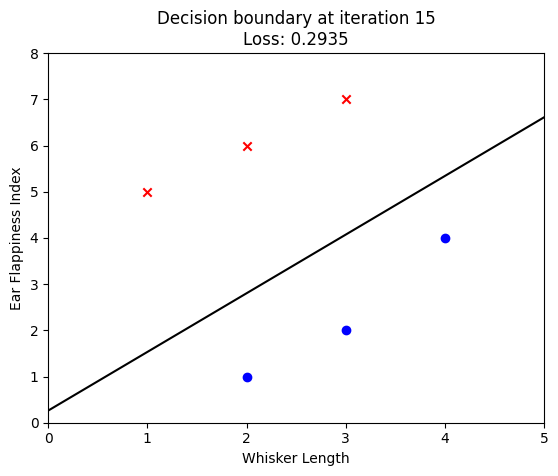

Iteration 15: Theta=[ 0.12472783  0.60430844 -0.47584954], Loss=0.2935


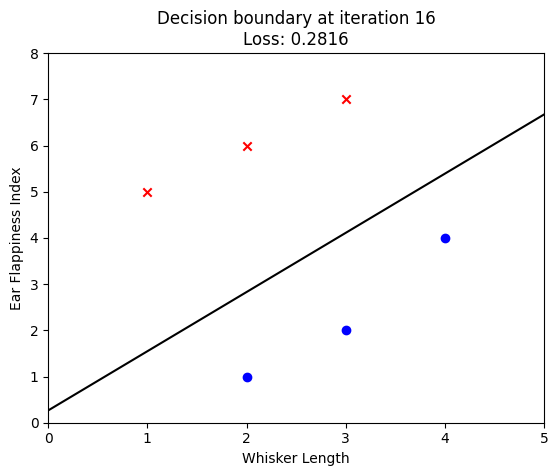

Iteration 16: Theta=[ 0.13099416  0.63225865 -0.49333668], Loss=0.2816


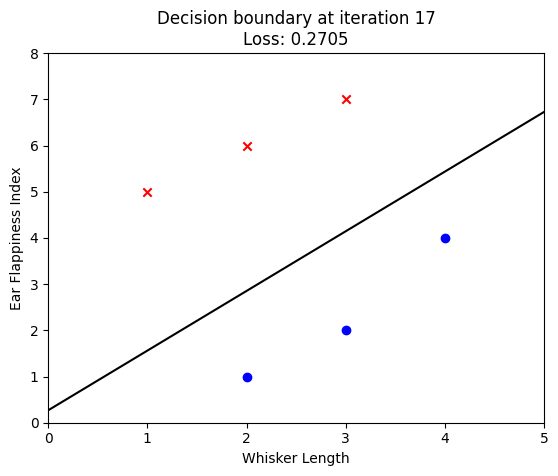

Iteration 17: Theta=[ 0.13705263  0.65922079 -0.51025395], Loss=0.2705


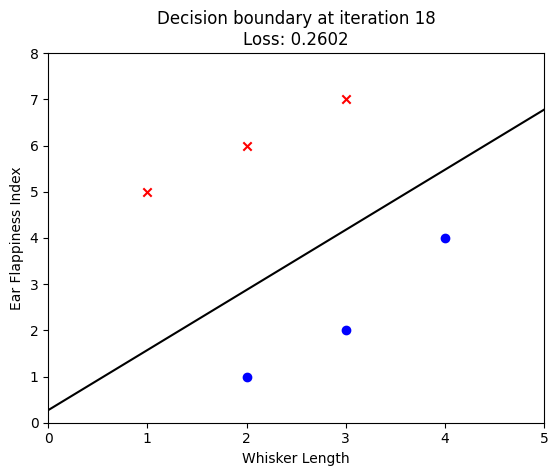

Iteration 18: Theta=[ 0.14291511  0.68525301 -0.52663127], Loss=0.2602


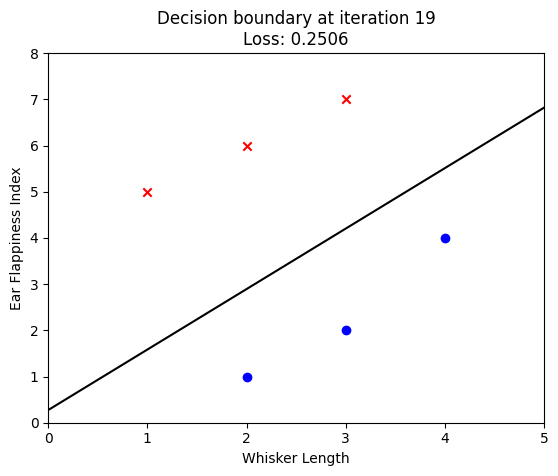

Iteration 19: Theta=[ 0.14859259  0.71040919 -0.54249675], Loss=0.2506


In [38]:
# Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.1, num_iterations=20):
    # Add intercept term to X
    X = np.hstack((np.ones((X.shape[0],1)), X))

    # Initialize weights
    weights = np.zeros(X.shape[1])

    # Gradient Descent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z)
        loss = compute_loss(y, hx)
        gradient = compute_gradient(X, y, hx)
        weights -= learning_rate * gradient

        plot_decision_boundary(X, y, weights, loss, i)
        print(f'Iteration {i}: Theta={weights}, Loss={loss:.4f}')

    return weights

# Training the model
weights = logistic_regression(X, y)